In [78]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import missingno as msno

In [79]:
# Set option to display numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [80]:
# Import climate data
climate_data = pd.read_excel("../data/climate/climate_data.xlsx")
climate_data.head()

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,...,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,GWETTOP,GWETROOT,GWETPROF
0,2000,1,1,17.300,11.440,14.370,17.280,13.660,25.070,11.410,...,1.190,316.440,4.800,6.620,2.900,3.730,286.880,0.540,0.550,0.540
1,2000,1,2,17.330,11.170,14.250,17.170,14.620,25.230,10.600,...,1.740,335.250,4.090,6.060,2.610,3.450,335.690,0.540,0.550,0.540
2,2000,1,3,17.010,10.350,13.680,16.900,13.920,24.720,10.800,...,1.800,332.440,4.250,6.910,2.180,4.730,332.750,0.530,0.550,0.540
3,2000,1,4,16.870,9.760,13.310,16.830,14.450,24.870,10.420,...,2.250,334.940,5.200,7.660,3.090,4.560,335.190,0.520,0.550,0.530
4,2000,1,5,16.840,9.690,13.260,16.910,15.040,24.730,9.690,...,1.860,333.880,4.620,6.920,2.670,4.250,334.120,0.520,0.550,0.530


In [81]:
# Detect missing values (-999) and replace them with NaN
climate_data.replace(-999, np.nan, inplace=True)

In [82]:
# Check missing values
climate_data.isna().sum()

YEAR           0
MO             0
DY             0
T2M            0
T2MDEW         0
T2MWET         0
TS             0
T2M_RANGE      0
T2M_MAX        0
T2M_MIN        0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WD10M          0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
WD50M          0
GWETTOP        0
GWETROOT       0
GWETPROF       0
dtype: int64

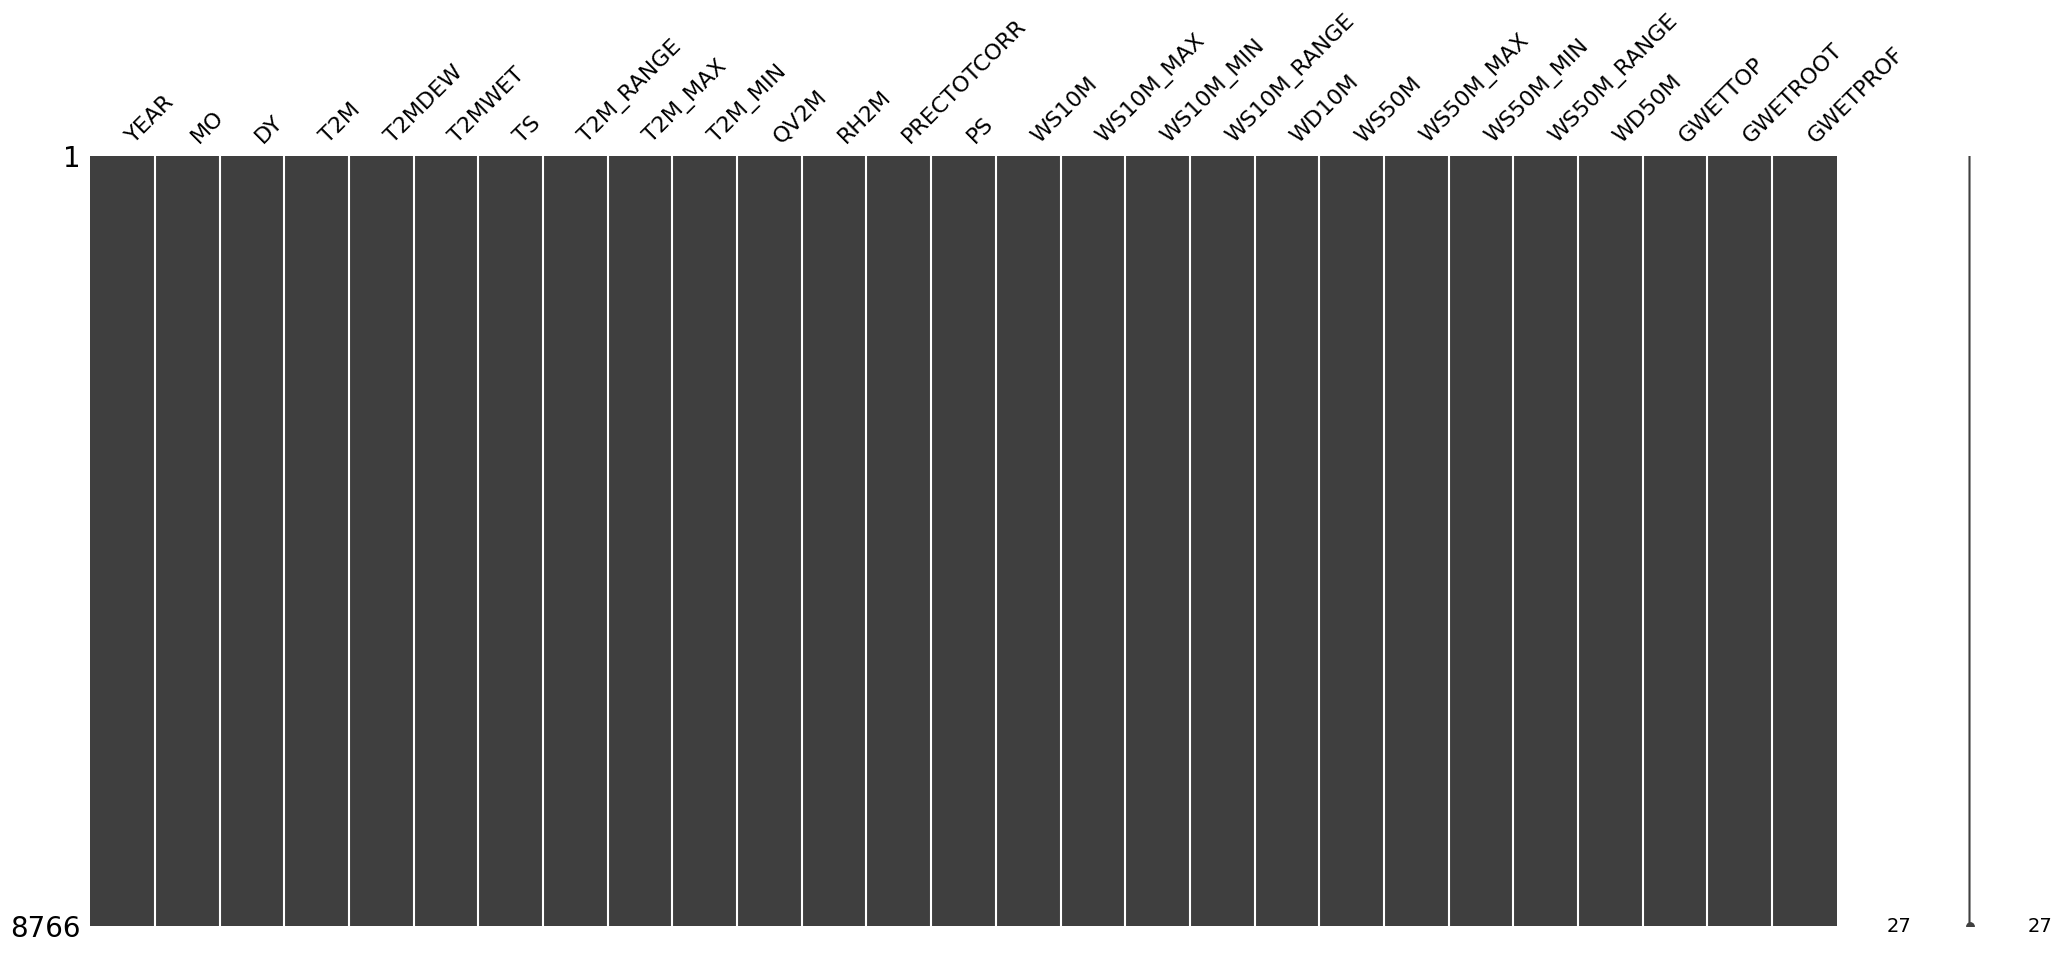

In [83]:
msno.matrix(climate_data);

In [84]:
# Replace numeric month values with month names
climate_data['MO'] = climate_data['MO'].replace({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})
climate_data.head()

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,...,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,GWETTOP,GWETROOT,GWETPROF
0,2000,Jan,1,17.300,11.440,14.370,17.280,13.660,25.070,11.410,...,1.190,316.440,4.800,6.620,2.900,3.730,286.880,0.540,0.550,0.540
1,2000,Jan,2,17.330,11.170,14.250,17.170,14.620,25.230,10.600,...,1.740,335.250,4.090,6.060,2.610,3.450,335.690,0.540,0.550,0.540
2,2000,Jan,3,17.010,10.350,13.680,16.900,13.920,24.720,10.800,...,1.800,332.440,4.250,6.910,2.180,4.730,332.750,0.530,0.550,0.540
3,2000,Jan,4,16.870,9.760,13.310,16.830,14.450,24.870,10.420,...,2.250,334.940,5.200,7.660,3.090,4.560,335.190,0.520,0.550,0.530
4,2000,Jan,5,16.840,9.690,13.260,16.910,15.040,24.730,9.690,...,1.860,333.880,4.620,6.920,2.670,4.250,334.120,0.520,0.550,0.530


In [85]:
# Convert numeric day values to date format (assuming YEAR is available)
climate_data['DY'] = pd.to_datetime(climate_data['YEAR'].astype(str) + '-' + climate_data['MO'] + '-' + climate_data['DY'].astype(str))
climate_data.head()

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,...,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,GWETTOP,GWETROOT,GWETPROF
0,2000,Jan,2000-01-01,17.300,11.440,14.370,17.280,13.660,25.070,11.410,...,1.190,316.440,4.800,6.620,2.900,3.730,286.880,0.540,0.550,0.540
1,2000,Jan,2000-01-02,17.330,11.170,14.250,17.170,14.620,25.230,10.600,...,1.740,335.250,4.090,6.060,2.610,3.450,335.690,0.540,0.550,0.540
2,2000,Jan,2000-01-03,17.010,10.350,13.680,16.900,13.920,24.720,10.800,...,1.800,332.440,4.250,6.910,2.180,4.730,332.750,0.530,0.550,0.540
3,2000,Jan,2000-01-04,16.870,9.760,13.310,16.830,14.450,24.870,10.420,...,2.250,334.940,5.200,7.660,3.090,4.560,335.190,0.520,0.550,0.530
4,2000,Jan,2000-01-05,16.840,9.690,13.260,16.910,15.040,24.730,9.690,...,1.860,333.880,4.620,6.920,2.670,4.250,334.120,0.520,0.550,0.530


In [86]:
# Rename columns MO, DY, and PRECTOTCORR
climate_data.rename(columns={'MO': 'MONTH', 'DY': 'DATE', 'PRECTOTCORR': 'PRECIPITATION'}, inplace=True)
climate_data.head()

,YEAR,MONTH,DATE,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,...,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,GWETTOP,GWETROOT,GWETPROF
0,2000,Jan,2000-01-01,17.300,11.440,14.370,17.280,13.660,25.070,11.410,...,1.190,316.440,4.800,6.620,2.900,3.730,286.880,0.540,0.550,0.540
1,2000,Jan,2000-01-02,17.330,11.170,14.250,17.170,14.620,25.230,10.600,...,1.740,335.250,4.090,6.060,2.610,3.450,335.690,0.540,0.550,0.540
2,2000,Jan,2000-01-03,17.010,10.350,13.680,16.900,13.920,24.720,10.800,...,1.800,332.440,4.250,6.910,2.180,4.730,332.750,0.530,0.550,0.540
3,2000,Jan,2000-01-04,16.870,9.760,13.310,16.830,14.450,24.870,10.420,...,2.250,334.940,5.200,7.660,3.090,4.560,335.190,0.520,0.550,0.530
4,2000,Jan,2000-01-05,16.840,9.690,13.260,16.910,15.040,24.730,9.690,...,1.860,333.880,4.620,6.920,2.670,4.250,334.120,0.520,0.550,0.530


In [87]:
# Convert MONTH and SEASON column to categorical type with levels in correct order
climate_data['MONTH'] = pd.Categorical(climate_data['MONTH'], categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ordered=True)

In [88]:
# Convert year into categorical type
climate_data['YEAR'] = climate_data['YEAR'].astype('category')
climate_data.head()

,YEAR,MONTH,DATE,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,...,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,GWETTOP,GWETROOT,GWETPROF
0,2000,Jan,2000-01-01,17.300,11.440,14.370,17.280,13.660,25.070,11.410,...,1.190,316.440,4.800,6.620,2.900,3.730,286.880,0.540,0.550,0.540
1,2000,Jan,2000-01-02,17.330,11.170,14.250,17.170,14.620,25.230,10.600,...,1.740,335.250,4.090,6.060,2.610,3.450,335.690,0.540,0.550,0.540
2,2000,Jan,2000-01-03,17.010,10.350,13.680,16.900,13.920,24.720,10.800,...,1.800,332.440,4.250,6.910,2.180,4.730,332.750,0.530,0.550,0.540
3,2000,Jan,2000-01-04,16.870,9.760,13.310,16.830,14.450,24.870,10.420,...,2.250,334.940,5.200,7.660,3.090,4.560,335.190,0.520,0.550,0.530
4,2000,Jan,2000-01-05,16.840,9.690,13.260,16.910,15.040,24.730,9.690,...,1.860,333.880,4.620,6.920,2.670,4.250,334.120,0.520,0.550,0.530


In [89]:
# Aggregate monthly data, calculating mean only for numeric columns
monthly_data = climate_data.groupby(['YEAR', 'MONTH']).agg('mean', numeric_only=True).reset_index()
monthly_data.head()

,YEAR,MONTH,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,GWETTOP,GWETROOT,GWETPROF
0,2000,Jan,18.433,10.210,14.321,18.154,13.939,25.856,11.918,7.836,...,2.085,234.404,3.764,5.954,1.746,4.209,234.079,0.483,0.512,0.500
1,2000,Feb,20.535,9.060,14.796,20.627,14.011,27.961,13.950,7.451,...,2.395,183.291,3.746,6.007,1.725,4.282,183.517,0.419,0.459,0.451
2,2000,Mar,25.716,14.200,19.959,25.924,14.354,33.293,18.940,10.681,...,3.120,183.562,4.636,7.297,2.369,4.929,184.998,0.408,0.440,0.433
3,2000,Apr,29.434,21.767,25.600,30.336,11.417,35.720,24.302,16.466,...,3.127,181.785,5.947,8.360,4.233,4.128,183.173,0.415,0.430,0.422
4,2000,May,28.500,24.740,26.618,28.822,6.729,32.106,25.376,19.628,...,2.437,174.316,4.966,7.065,3.381,3.684,174.804,0.640,0.622,0.594


In [91]:
# Convert 'YEAR' and 'MONTH' from Categorical to string
monthly_data['YEAR'] = monthly_data['YEAR'].astype(str)
monthly_data['MONTH'] = monthly_data['MONTH'].astype(str)

# Adding a 'DATE' column that represents the first day of each month
monthly_data['DATE'] = pd.to_datetime(monthly_data['YEAR'] + '-' + monthly_data['MONTH'] + '-01')

# Display the first few rows to verify the 'DATE' column
monthly_data.head()

,YEAR,MONTH,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,GWETTOP,GWETROOT,GWETPROF,DATE
0,2000,Jan,18.433,10.210,14.321,18.154,13.939,25.856,11.918,7.836,...,234.404,3.764,5.954,1.746,4.209,234.079,0.483,0.512,0.500,2000-01-01
1,2000,Feb,20.535,9.060,14.796,20.627,14.011,27.961,13.950,7.451,...,183.291,3.746,6.007,1.725,4.282,183.517,0.419,0.459,0.451,2000-02-01
2,2000,Mar,25.716,14.200,19.959,25.924,14.354,33.293,18.940,10.681,...,183.562,4.636,7.297,2.369,4.929,184.998,0.408,0.440,0.433,2000-03-01
3,2000,Apr,29.434,21.767,25.600,30.336,11.417,35.720,24.302,16.466,...,181.785,5.947,8.360,4.233,4.128,183.173,0.415,0.430,0.422,2000-04-01
4,2000,May,28.500,24.740,26.618,28.822,6.729,32.106,25.376,19.628,...,174.316,4.966,7.065,3.381,3.684,174.804,0.640,0.622,0.594,2000-05-01


In [92]:
# Import dengue cases data
dengue_cases = pd.read_excel("../data/dengue/Dengue2000-2023[Country].xlsx", sheet_name=1)
dengue_cases = dengue_cases.melt(id_vars=['MONTH'], var_name='YEAR', value_name='CASES')
dengue_cases.head()

,MONTH,YEAR,CASES
0,Jan,2000,NaN
1,Feb,2000,NaN
2,Mar,2000,NaN
3,Apr,2000,NaN
4,May,2000,NaN


In [93]:
# Check missing values only for 'CASES'
dengue_cases['CASES'].isna().sum()

180

In [94]:
# Fill missing values with 0 only for 'CASES'
dengue_cases['CASES'].fillna(0, inplace=True)
dengue_cases.head()

,MONTH,YEAR,CASES
0,Jan,2000,0.000
1,Feb,2000,0.000
2,Mar,2000,0.000
3,Apr,2000,0.000
4,May,2000,0.000


In [95]:
# Ensure YEAR is of the same data type in both DataFrames
monthly_data['YEAR'] = monthly_data['YEAR'].astype(str)
dengue_cases['YEAR'] = dengue_cases['YEAR'].astype(str)

# Ensure MONTH is formatted consistently and matches in both DataFrames
# Assuming MONTH is already correctly formatted as full names or abbreviations as required.

# Perform the merge on 'YEAR' and 'MONTH'
merged_data = pd.merge(monthly_data, dengue_cases, on=['YEAR', 'MONTH'], how='left')

# Display the head of the merged DataFrame to check the first few rows
merged_data.head()

,YEAR,MONTH,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,...,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,GWETTOP,GWETROOT,GWETPROF,DATE,CASES
0,2000,Jan,18.433,10.210,14.321,18.154,13.939,25.856,11.918,7.836,...,3.764,5.954,1.746,4.209,234.079,0.483,0.512,0.500,2000-01-01,0.000
1,2000,Feb,20.535,9.060,14.796,20.627,14.011,27.961,13.950,7.451,...,3.746,6.007,1.725,4.282,183.517,0.419,0.459,0.451,2000-02-01,0.000
2,2000,Mar,25.716,14.200,19.959,25.924,14.354,33.293,18.940,10.681,...,4.636,7.297,2.369,4.929,184.998,0.408,0.440,0.433,2000-03-01,0.000
3,2000,Apr,29.434,21.767,25.600,30.336,11.417,35.720,24.302,16.466,...,5.947,8.360,4.233,4.128,183.173,0.415,0.430,0.422,2000-04-01,0.000
4,2000,May,28.500,24.740,26.618,28.822,6.729,32.106,25.376,19.628,...,4.966,7.065,3.381,3.684,174.804,0.640,0.622,0.594,2000-05-01,0.000


In [96]:
final_data = merged_data[['YEAR', 'MONTH', 'DATE', 'T2M', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECIPITATION', 'PS', 'GWETTOP','CASES']]

In [97]:
final_data.head()

,YEAR,MONTH,DATE,T2M,T2M_MAX,T2M_MIN,RH2M,PRECIPITATION,PS,GWETTOP,CASES
0,2000,Jan,2000-01-01,18.433,25.856,11.918,62.303,0.336,101.304,0.483,0.000
1,2000,Feb,2000-02-01,20.535,27.961,13.950,52.388,0.768,101.202,0.419,0.000
2,2000,Mar,2000-03-01,25.716,33.293,18.940,55.771,2.491,100.850,0.408,0.000
3,2000,Apr,2000-04-01,29.434,35.720,24.302,67.859,5.166,100.445,0.415,0.000
4,2000,May,2000-05-01,28.500,32.106,25.376,81.628,13.227,100.291,0.640,0.000


In [98]:
# Export the merged data to a CSV file
final_data.to_csv("../data/processed/climate_dengue_data.csv", index=False)